# **Section 3: Multiple linear regression and polynomial regression**
<a href="https://colab.research.google.com/github/osuranyi/UdemyCourses/blob/main/LinearRegression/Section3_MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multiple linear regression**

Let us have an n-dimensional feature space. Feature vectors and corresponding output values are denoted by $(\mathbf{x}_i,y_i)$. Assuming a linear relationship, we might try to model the data with the following relationship:
$$
\hat{y}_i = \theta^T \mathbf{x}_i + \theta_0, \quad\quad \text{for all $i$}
$$
where $\theta$ is a vector of parameters: $\theta = (\theta_1,\theta_2,\dots)$, $\theta_0$ is another parameter called the intercept, and $\hat{y}_i$ are the predictions. This equation can be written in a more compact form if we redefine $\mathbf{x}_i$ and $\theta$ as:
\begin{align}
\mathbf{x}_i \rightarrow \mathbf{x}_i =
\left[
\begin{matrix}
1 \\ x_{i1} \\ x_{i2} \\ \dots
\end{matrix}
\right],
\theta \rightarrow \theta =
\left[
\begin{matrix}
\theta_0 \\ \theta_1 \\ \theta_2 \\ \dots
\end{matrix}
\right],
\end{align}
and introduce the following new notations:
\begin{align}
\mathbf{X} &=
\left[\begin{matrix}
 \mathbf{x}_1^T \\
 \mathbf{x}_2^T \\
\dots
\end{matrix}\right],
\mathbf{y} = 
\left[\begin{matrix}
 y_1 \\
 y_2 \\
\dots
\end{matrix}\right],
\mathbf{\hat{y}} = 
\left[\begin{matrix}
 \hat{y}_1 \\
 \hat{y}_2 \\
\dots
\end{matrix}\right].
\end{align}
Then our linear model becomes:
$$
\mathbf{\hat{y}} = \mathbf{X}\theta.
$$
In order to find the $\theta$ parameters that fits our model the best, we should minimize the mean squared error:
$$
\text{MSE} = \min (\mathbf{y}-\mathbf{\hat{y}})^T (\mathbf{y}-\mathbf{\hat{y}}) = \min_\theta (\mathbf{y}-\mathbf{X}\theta)^T (\mathbf{y}-\mathbf{X}\theta).
$$
The optimum can be calculated analytically, if we take the derivatives of this above equation using the product rule:
$$
(-\mathbf{X}^T) (\mathbf{y}-\mathbf{X}\theta) + (\mathbf{y}-\mathbf{X}\theta)^T(-\mathbf{X}) = 2(-\mathbf{X}^T)(\mathbf{y}-\mathbf{X}\theta) = 0,
$$
which after rearranging, becomes:
$$
\mathbf{X}^T\mathbf{X} \theta = \mathbf{X}^T \mathbf{y},
$$
which is a linear system of equations for $\theta$. This can be solved by either inverting the $\mathbf{X}^T\mathbf{X}$ matrix or by Gauss elimination.

Now, the implementation:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [109]:
class LinearRegression:
  def addOnes(self,X_in):
    return np.column_stack( (np.ones(X_in.shape[0]),X_in) )
  
  def fit(self,X_in,y):
    X = self.addOnes(X_in) 
    U = X.T @ X
    v = X.T @ y
    self.theta = np.linalg.solve(U,v)

  def predict(self,X_in):
    X = self.addOnes(X_in)
    return X @ self.theta

  def score(self,X_in,y):
    SSres = (y-self.predict(X_in)).T @ (y-self.predict(X_in))
    SStot = (y-y.mean()).T @ (y-y.mean())
    return 1. - SSres/SStot

And finally testing the scripts:

theta:  [1.46191241 2.01666793 2.96985048]
R^2:  0.9980040612475778


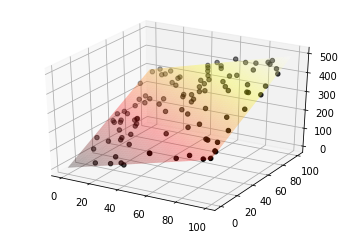

In [91]:
# Reading data
data = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_2d.csv',header=None)

X = data[[0,1]].values
y = data[2].values

# Creating and fitting model
model = LinearRegression()
model.fit(X,y)

print("theta: ",model.theta)
print("R^2: ", model.score(X,y))

# Plotting the results
mesh_x = np.arange(0, 100, 1.0)
mesh_y = np.arange(0, 100, 1.0)
mesh_x,mesh_y = np.meshgrid(mesh_x,mesh_y)

X_fit = np.column_stack((mesh_x.flatten(),mesh_y.flatten()))
y_fit = model.predict(X_fit)
z = y_fit.reshape(100,100)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(mesh_x, mesh_y, z,cmap='hot',alpha=0.3, antialiased=True)
ax.scatter(X[:,0],X[:,1],y,c='black');

## **Polynomial regression**

R^2:  0.9991412296366858


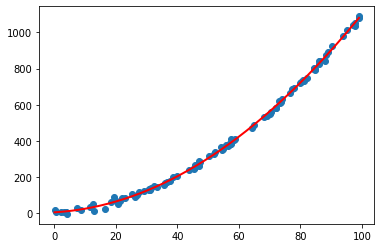

In [112]:
# Reading data
data = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_poly.csv',header=None)

x = data[0].values
y = data[1].values
X = np.column_stack( (x,x*x) )

polyfit = LinearRegression()
polyfit.fit(X,y)
print("R^2: ",polyfit.score(X,y))

# Draw results
plt.scatter(x,y)
xfit = np.linspace(x.min(),x.max(),1000)
Xfit = np.column_stack( (xfit,xfit*xfit) )
yfit = polyfit.predict(Xfit)
plt.plot(xfit,yfit,c='r',linewidth=2);

## **Predicting systolic blood pressure from age and weight**

In [111]:
data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')

X = data[['X2','X3']].values
y = data['X1']

model = LinearRegression()
model.fit(X,y)

print("R^2: ",model.score(X,y))
print("Predict my blood pressure - age: 30, weight: 156 lbs")
x_pred = np.array([30,156])
x_pred.shape = [1,2]
print(model.predict(x_pred))

*** No CODEPAGE record, no encoding_override: will use 'ascii'
R^2:  0.976847104150209
Predict my blood pressure - age: 30, weight: 156 lbs
[109.0745783]
